In [47]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score
import random
import matplotlib.pyplot as plt

In [48]:
from tensorflow import keras

In [49]:
%matplotlib inline

In [50]:
mnist=tf.keras.datasets.mnist

In [51]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

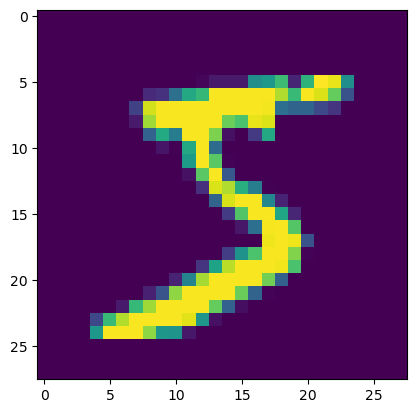

In [52]:
plt.matshow(x_train[0])

In [53]:
x_train[0].min(),x_train[0].max()

(0, 255)

In [54]:
x_train=(x_train-0.0)/(255.0-0.0)
x_test=(x_test-0.0)/(255.0-0.0)
x_train[0].min(),x_train[0].max()

(0.0, 1.0)

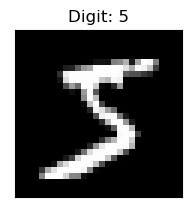

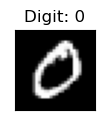

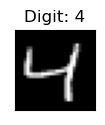

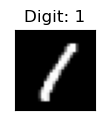

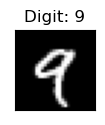

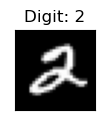

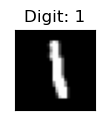

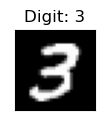

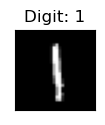

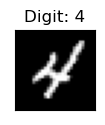

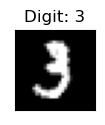

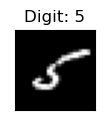

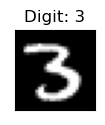

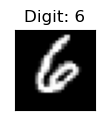

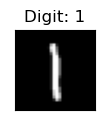

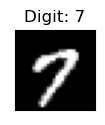

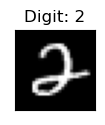

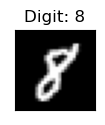

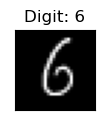

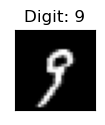

In [55]:
def plot_digit(image,digit,plt,i):
    plt.subplot(4,5,i+1)
    plt.imshow(image,cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(16,10))
for i in range(20):
    plot_digit(x_train[i],y_train[i],plt,i)
    plt.show()

In [66]:
# x_train=x_train.reshape((x_train.shape+(1,)))
# x_test=x_test.reshape((x_test.shape+(1,)))
# y_train[0:20]

In [67]:
model=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [68]:
model.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               540900    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [69]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4700 - accuracy: 0.8722 - val_loss: 0.2362 - val_accuracy: 0.9326
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2191 - accuracy: 0.9360 - val_loss: 0.1775 - val_accuracy: 0.9464
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1697 - accuracy: 0.9494 - val_loss: 0.1552 - val_accuracy: 0.9525
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1396 - accuracy: 0.9584 - val_loss: 0.1362 - val_accuracy: 0.9581
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1182 - accuracy: 0.9650 - val_loss: 0.1151 - val_accuracy: 0.9646
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1033 - accuracy: 0.9686 - val_loss: 0.0986 - val_accuracy: 0.9709
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0922 - accuracy: 0.9717 - val_loss: 0.0919 - 

1/1 [==============================] - 0s 44ms/step


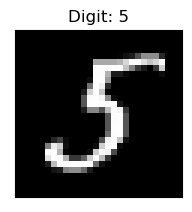

1/1 [==============================] - 0s 19ms/step


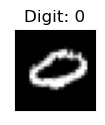

1/1 [==============================] - 0s 17ms/step


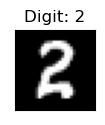

1/1 [==============================] - 0s 18ms/step


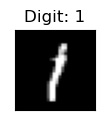

1/1 [==============================] - 0s 17ms/step


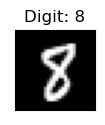

1/1 [==============================] - 0s 16ms/step


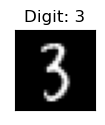

1/1 [==============================] - 0s 18ms/step


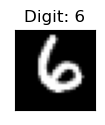

1/1 [==============================] - 0s 12ms/step


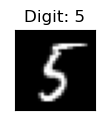

1/1 [==============================] - 0s 16ms/step


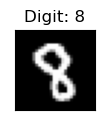

1/1 [==============================] - 0s 17ms/step


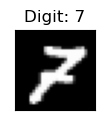

1/1 [==============================] - 0s 16ms/step


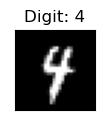

1/1 [==============================] - 0s 24ms/step


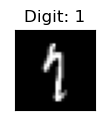

1/1 [==============================] - 0s 15ms/step


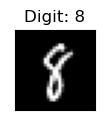

1/1 [==============================] - 0s 10ms/step


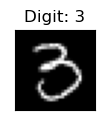

1/1 [==============================] - 0s 4ms/step


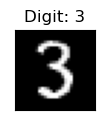

1/1 [==============================] - 0s 15ms/step


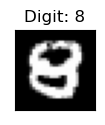

1/1 [==============================] - 0s 11ms/step


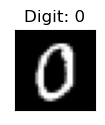

1/1 [==============================] - 0s 5ms/step


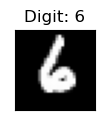

1/1 [==============================] - 0s 16ms/step


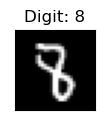

1/1 [==============================] - 0s 13ms/step


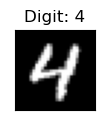

In [70]:
plt.figure(figsize=(16,10))
for i in range(20):
    image=random.choice(x_test).squeeze()
    digit=np.argmax(model.predict(image.reshape((1,28,28,1)))
    [0],axis=-1)
    plot_digit(image,digit,plt,i)
    plt.show()

In [65]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("test loss %.3f" %test_loss)
print("test loss %.3f" %test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0788 - accuracy: 0.9745
test loss 0.079
test loss 0.975
